In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
# Set svg format
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [18]:
df = pd.read_csv('student-mat.csv', sep = ';')

### Data Summary

In [19]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [20]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [21]:
data = df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences', 'health', 'Dalc', 'Walc', 'Fjob', 'Mjob']]
data.shape

(395, 11)

In [22]:
data.head()

,G1,G2,G3,studytime,failures,absences,health,Dalc,Walc,Fjob,Mjob
0,5,6,6,2,0,6,3,1,1,teacher,at_home
1,5,5,6,2,0,4,3,1,1,other,at_home
2,7,8,10,2,3,10,3,2,3,other,at_home
3,15,14,15,3,0,2,5,1,1,services,health
4,6,10,10,2,0,4,5,1,2,other,other


In [23]:
# converting jobs of parent from string to integer
# teacher = 0, health = 1, services = 2, at_home = 3, other = 4
jobs = ['teacher', 'health', 'services', 'at_home', 'other']
for job in jobs:
    data.loc[data['Fjob'] == job, 'Fjob'] = jobs.index(job)
    data.loc[data['Mjob'] == job, 'Mjob'] = jobs.index(job)

fjobs = data['Fjob'].value_counts()
mjobs = data['Mjob'].value_counts()
print(fjobs)
print(mjobs)

4    217
2    111
0     29
3     20
1     18
Name: Fjob, dtype: int64
4    141
2    103
3     59
0     58
1     34
Name: Mjob, dtype: int64


In [24]:
# Sort
fjobs.sort_index(inplace = True)
mjobs.sort_index(inplace = True)
print(fjobs)
print(mjobs)

X_axis = np.arange(len(jobs))

0     29
1     18
2    111
3     20
4    217
Name: Fjob, dtype: int64
0     58
1     34
2    103
3     59
4    141
Name: Mjob, dtype: int64


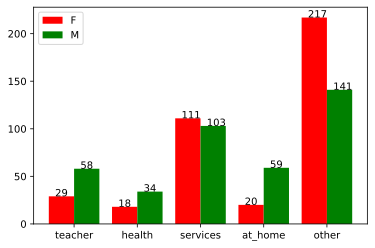

In [25]:
# Multiple bar chart
plt.bar(X_axis - 0.2, fjobs, 0.4, color = 'r', label = 'F')
plt.bar(X_axis + 0.2, mjobs, 0.4, color = 'g', label = 'M')
plt.xticks(X_axis, jobs)
for i in range(len(fjobs)):
    plt.text(i - 0.3, fjobs[i], fjobs[i])
for i in range(len(mjobs)):
    plt.text(i + 0.1, mjobs[i], mjobs[i])
plt.legend()
plt.show()

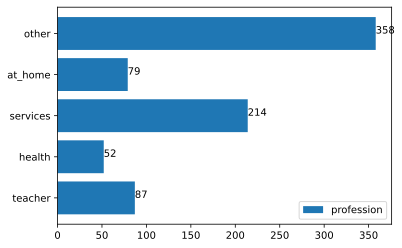

In [26]:
# Bar chart of jobs
profession = data['Fjob'].value_counts() + data['Mjob'].value_counts()
plt.barh(jobs, profession, label = 'profession')
for index, value in enumerate(profession):
    plt.text(value, index, str(value))
plt.legend()
plt.show()

In [27]:
predict = 'G3'
X = np.array(data.drop(labels = [predict], axis = 1))
y = np.array(data[predict])
# X = X - np.min(X) / np.max(X) - np.min(X)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [28]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
accuracy = linear.score(x_test, y_test)
print('Accuracy: ', accuracy)

Accuracy:  0.918234959020275


In [29]:
print('Coeffiecients:', linear.coef_)
print('Intercept:', linear.intercept_)

Coeffiecients: [ 0.15860267  0.99227242 -0.19452835 -0.20306782  0.04351017  0.07783217
 -0.11972683  0.11110262  0.04785773  0.01024326]
Intercept: -2.2482472277810555


In [30]:
predictions = linear.predict(x_test)

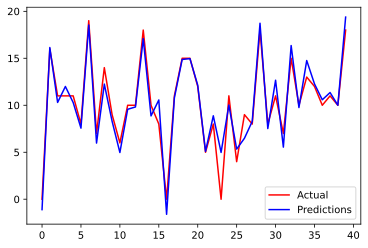

In [31]:
x_c = [i for i in range(len(predictions))]
plt.plot(x_c, y_test, color = 'red', label = 'Actual')
plt.plot(x_c, predictions, color = 'blue', label = 'Predictions')
plt.legend()
plt.show()

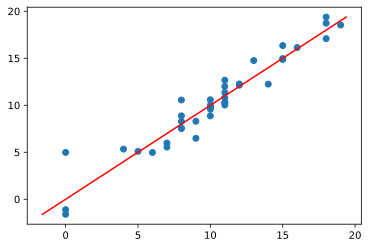

In [32]:
p1 = max(max(y_test), max(predictions))
p2 = min(min(y_test), min(predictions))
plt.scatter(y_test, predictions)
plt.plot([p1, p2], [p1, p2], color = 'red')
plt.show()